# Attention is all u need

## 背景

对于文本数据来说，基本的文本处理操作是对文本分词（包括去除停用词、符号等），然后对每一个token进行embedding处理，将文本转变为计算机可以处理的数据。

在使用CNN处理时，个人理解，可以将文本的数据表达看成是单通道的图片，然后使用不同的卷积核，提取不同的文本特征。但是问题就是，一般来说卷积核是用来提取局部信息而不是远距离依赖的，容易丢失文本序列比较重要的序列位置信息，尤其是在NLP中，不同的位置就会导致不同的结果。同时，卷积的计算量也比较大。


## 编码器-解码器

- 编码器->由六个完全一样的层堆叠而成，每层有两个子层
  - 对头注意力的结果与输入的数据做残差连接后Normlization
  - 前馈传播结果与上一层的数据做add与Normalization
- 解码器 -> 同样是六层，但是多了一个掩码多头注意力
  - 掩码是为了让位置i的token只能用之前的i-1个位置的信息。

## self-attention

self-attention 计算输入中的每一个元素与其余元素的相关性。
![Attention Diagram](https://i-blog.csdnimg.cn/blog_migrate/c62ce015fa334d7a349aabfdc1b6d7b3.png)

### 相关性计算
- Dot-product(点积)
  - 输入的两个向量，一个是要查询的元素Q,一个是要计算相似度的键K，分别左乘权重矩阵后得到对应的q、k矩阵，最后$$\alpha = \sum_i^n q_i * k_i$$
![Dot-product](https://i-blog.csdnimg.cn/blog_migrate/d214521b7020c2b109b61fd5cadcaeb0.png)

### 计算步骤
- 计算Q、K、V三个矩阵->所有输入共享这三个矩阵
  $$ Q = XW^q$$
  $$ K = XW^k$$
  $$ V = XW^v$$
- 计算K、Q之间的相关性
    $$ A = \frac{QK^T}{\sqrt{d_k}}$$
    $$ A' = softmax(A)$$
- 计算最后输出
  $$ O = A'V$$

## Layer Normlization

每一层输出结果的改变将会对下一层输入造成高度相关的改变，尤其是使用ReLU激活函数的。这也表明协同转变的问题可以通过修复每一层的均值和方差来减少。
$$
\mu^{l} = \frac{1}{H} \sum_{i=1}^{H} a_i^{l}
$$

$$
\sigma^{l} = \sqrt{\frac{1}{H} \sum_{i=1}^{H} (a_i^{l} - \mu^{l})^2}
$$

其中H代表每一层的隐藏单元数量。
层标准化不会对batch的大小做限制。

https://snailcoder.github.io/2024/05/01/batchnorm-and-layernorm.html

## 多头注意力

使用不同的注意力头去学习不同的特征，最后再将学习到的特征拼接起来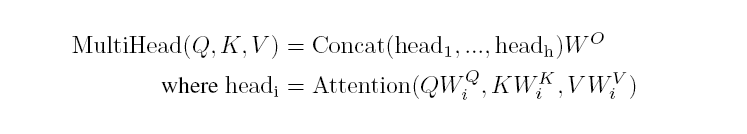
$$d_k = d_v = \frac{d_{model}}{h}$$